In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib import colors

%matplotlib inline  

In [3]:
bins = [-10,0,50,59,61,63,64.5,66,68,70,71.5,73,75,76.5,78,80,82,84,90,100,110]
size = (10,10)

cleaned_txt = "./../../../Data/Vectors/Major_Tunes_Restless_Notes.npy"
cleaned_data = np.load(cleaned_txt)

In [4]:
cleaned_arr = np.array([cleaned_data[i].flatten() for i in range(cleaned_data.ravel().shape[0])])  
cleaned_flat_arr = np.hstack(cleaned_arr)

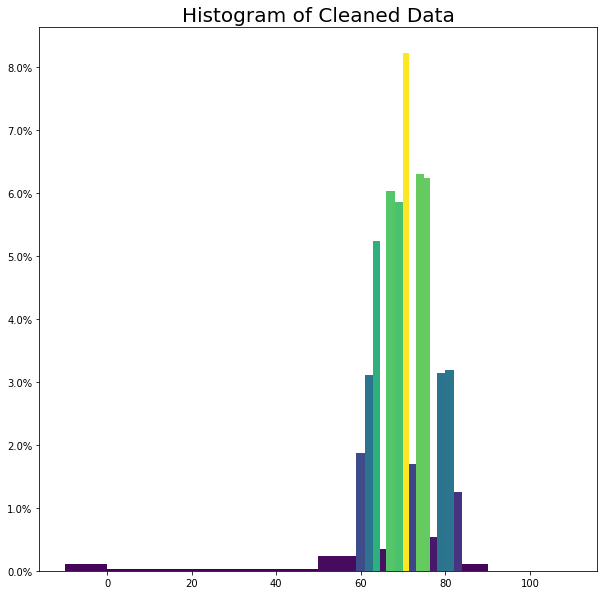

In [5]:
fig, ax = plt.subplots(figsize=(10,10))

plt.title("Histogram of Cleaned Data", fontsize=20)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = ax.hist(cleaned_flat_arr, bins=bins, density=True)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.figsize = (10,10)

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

In [6]:
import keras

trained_GAN = keras.models.load_model("./../../Model/Trained/generator.h5")
minNote = 57
maxNote = 80

Using TensorFlow backend.
/home/vineel/PycharmProjects/gans/venv/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [7]:
def scale(arr, minVal, maxVal):
    return 0.5*(maxVal-minVal)*(arr+1) + minVal #Map from [-1,1] to [minVal, maxVal]

In [8]:
noise = np.random.normal(0, 1, [1000, 100]) #20 arrays of noise of shape [100,]
generated_samples = trained_GAN.predict(noise)

generated_samples = generated_samples[:,:-1, 4:-4]
generated_samples = np.squeeze(generated_samples, axis=3) #Remove colour channel
generated_samples = generated_samples.reshape([-1, 16, 16])

In [9]:
#Make values discrete
#generated_samples = np.around(generated_samples, 0).astype(np.int32)

#Round output values to available values in D major
def samples_to_d_major(samples):
  
  def note_to_d_major(note):
    d_maj_values = np.array([62, 64, 66, 67, 69, 71, 73]) - 60 #C is now at 0
    octave = note // 12
    noteInScale = note % 12

    noteDistances = np.abs(d_maj_values - noteInScale)
    roundedNote = d_maj_values[noteDistances.argmin()]
    return roundedNote + 12*octave

  note_to_d_major = np.vectorize(note_to_d_major)
    
  return note_to_d_major(samples).astype(np.int32)

generated_samples_scaled = scale(generated_samples, minNote, maxNote)
generated_samples_snapped = samples_to_d_major(generated_samples_scaled)
generated_mse = (np.square(generated_samples_scaled - generated_samples_snapped)).mean(axis=1)

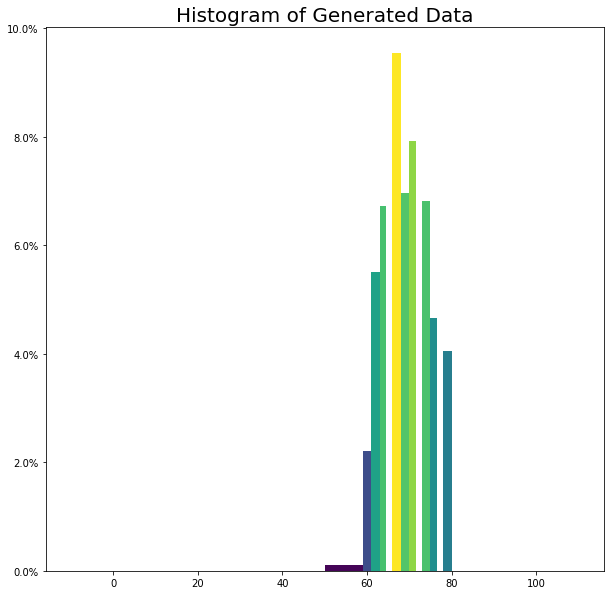

In [10]:
generated_flat_arr = np.hstack(generated_samples_snapped.ravel())

fig, ax = plt.subplots(figsize=(10,10))

plt.title("Histogram of Generated Data", fontsize=20)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = ax.hist(generated_flat_arr, bins=bins, density=True)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.figsize = (10,10)

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

AttributeError: 'BarContainer' object has no attribute 'set_facecolor'

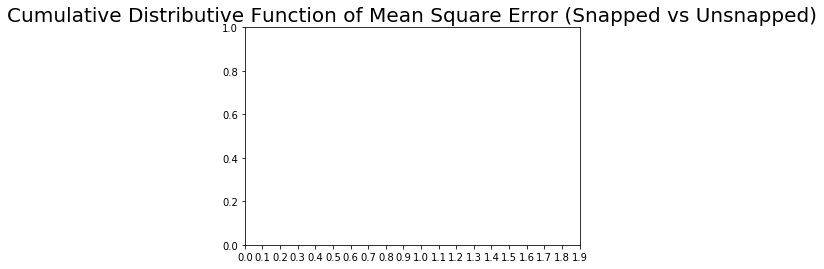

In [12]:
### fig, ax = plt.subplots(figsize=(10,10))

plt.title("Cumulative Distributive Function of Mean Square Error (Snapped vs Unsnapped)", fontsize=20)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = ax.hist(generated_mse, bins=[x/10 for x in range(20)], cumulative=True, density=True)

N = np.asarray(N, dtype=np.float32)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())
#ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.xticks(np.arange(0, 2, step=0.1))
ax.figsize = (10,10)

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)